=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67896 non-null  float64
 12  surface_l

cadastral_income                  44967
surface_land_sqm                  36256
construction_year                 33391
primary_energy_consumption_sqm    26567
nbr_frontages                     26346
longitude                         14098
latitude                          14098
terrace_sqm                       13140
total_area_sqm                     7615
garden_sqm                         2939
province                              0
region                                0
subproperty_type                      0
property_type                         0
zip_code                              0
locality                              0
id                                    0
price                                 0
fl_open_fire                          0
fl_furnished                          0
nbr_bedrooms                          0
equipped_kitchen                      0
fl_garden                             0
fl_terrace                            0
fl_floodzone                          0



=== Percentage of missing values per column ===


cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
longitude                         18.670128
latitude                          18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
property_type                      0.000000
zip_code                           0.000000
locality                           0.000000
id                                 0.000000
price                              0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_garden                       

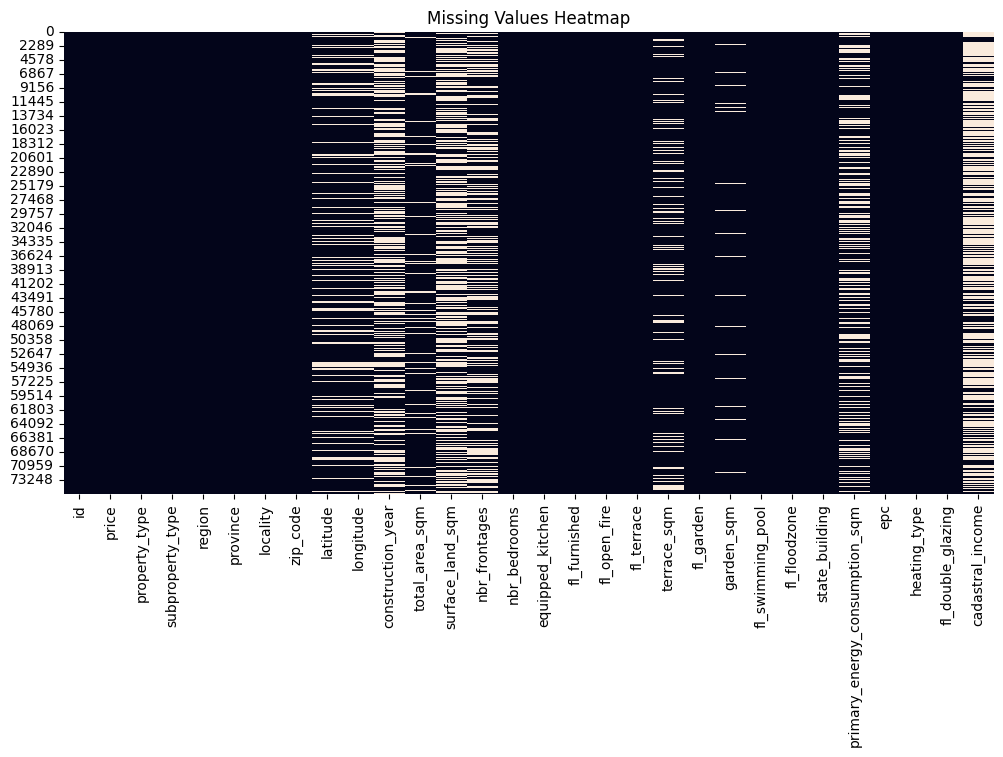


Rows with highest missing counts:


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income,missing_count
70525,8671000,199900.0,APARTMENT,APARTMENT,Flanders,East Flanders,Oudenaarde,9600,NaN,NaN,...,NaN,0,0,MISSING,83.0,A,GAS,1,NaN,9
22839,41635000,129000.0,APARTMENT,FLAT_STUDIO,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,0,JUST_RENOVATED,NaN,A+,ELECTRIC,1,NaN,9
50404,37809000,175000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,6000,NaN,NaN,...,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN,8
34149,39428000,308085.0,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3500,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
865,65561000,367288.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1140,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
37192,38872000,340000.0,APARTMENT,APARTMENT,Flanders,Flemish Brabant,Halle-Vilvoorde,1800,NaN,NaN,...,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,0,NaN,8
51807,33056000,375000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Brugge,8370,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
74425,21013000,353000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
30704,33399000,229000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Sint-Niklaas,9160,NaN,NaN,...,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN,8
54060,78807000,149500.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Charleroi,6060,NaN,NaN,...,0.0,0,1,JUST_RENOVATED,249.0,C,MISSING,0,NaN,8


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data
file_path = '../data/raw/immoweb_data.csv'
df = pd.read_csv(file_path)

# --- 1. Basic info ---
print("=== DataFrame Info ===")
df.info()

print("\n=== Number of missing values per column ===")
missing_counts = df.isna().sum()
display(missing_counts.sort_values(ascending=False))

print("\n=== Percentage of missing values per column ===")
missing_percent = df.isna().mean() * 100
display(missing_percent.sort_values(ascending=False))

# --- 2. Visualize missing data using seaborn heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# --- 3. Identify rows with high missing values ---
df['missing_count'] = df.isna().sum(axis=1)
print("\nRows with highest missing counts:")
display(df.sort_values('missing_count', ascending=False).head(10))
